### Breast Cancer

In [50]:
from src import LogRegCDD
import pandas as pd

In [63]:
path = "../data/preprocessed/breast_cancer.csv"

In [52]:
df = pd.read_csv(path)
df_train = df.sample(frac=0.8, random_state=42)
df_test = df.drop(df_train.index)

In [53]:
Y_train = df_train["Y"].values
Y_test = df_test["Y"].values


In [72]:
X_train = df_train.drop(columns=["Y"]).values
X_test = df_test.drop(columns=["Y"]).values

### Ridge, alpha = 1

Validation scores: [0.94736842 0.94736842 0.94736842 0.94736842 0.95614035 0.95614035
 0.95614035 0.95614035 0.95614035 0.95614035 0.95614035 0.95614035
 0.95614035 0.95614035 0.95614035 0.95614035 0.95614035 0.95614035
 0.96491228 0.96491228 0.96491228 0.96491228 0.96491228 0.96491228
 0.96491228 0.96491228 0.96491228 0.96491228 0.96491228 0.96491228
 0.96491228 0.96491228 0.96491228 0.96491228 0.96491228 0.96491228
 0.96491228 0.96491228 0.96491228 0.95614035 0.94736842 0.94736842
 0.94736842 0.95614035 0.94736842 0.94736842 0.95614035 0.95614035
 0.94736842 0.93859649]
Best lambda: 0.001114383876977438
Probabilities: [0.99946287 0.98190115 0.75447643 0.9700359  0.01186641]


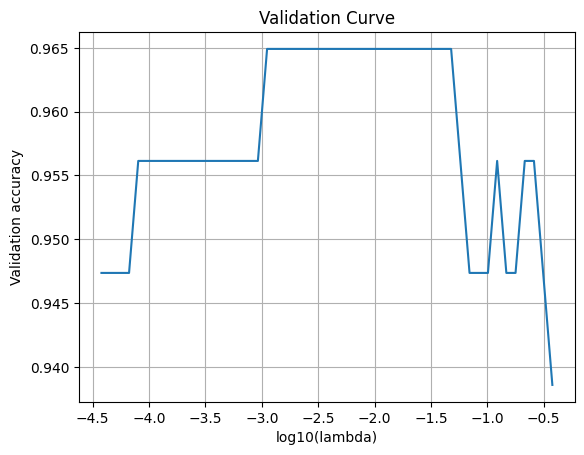

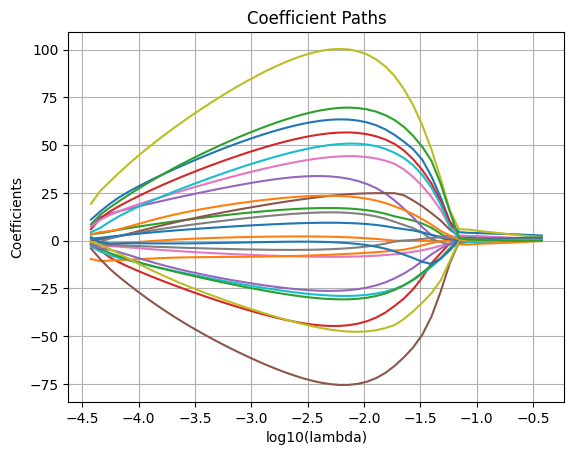

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from src.LogRegCDD import LogRegCDD 


LogRegCDD_Breast_Cancer = LogRegCDD(alpha=1.0, n_lambda=50)

LogRegCDD_Breast_Cancer.fit(X_train, Y_train)

val_scores = LogRegCDD_Breast_Cancer.validate(X_test, Y_test, measure="accuracy")
print("Validation scores:", val_scores)

best_lambda = LogRegCDD_Breast_Cancer.lambdas_[val_scores.argmax()]
print("Best lambda:", best_lambda)

probs = LogRegCDD_Breast_Cancer.predict_proba(X_test)
print("Probabilities:", probs[:5])

LogRegCDD_Breast_Cancer.plot_score(measure="accuracy")
LogRegCDD_Breast_Cancer.plot_coef()

### Elastic net, alpha = 0.5

Validation scores: [0.94736842 0.94736842 0.94736842 0.94736842 0.95614035 0.95614035
 0.95614035 0.95614035 0.95614035 0.95614035 0.95614035 0.95614035
 0.95614035 0.95614035 0.95614035 0.95614035 0.95614035 0.95614035
 0.95614035 0.95614035 0.95614035 0.95614035 0.95614035 0.94736842
 0.94736842 0.94736842 0.94736842 0.94736842 0.94736842 0.94736842
 0.94736842 0.94736842 0.94736842 0.94736842 0.94736842 0.94736842
 0.94736842 0.94736842 0.94736842 0.94736842 0.94736842 0.95614035
 0.95614035 0.95614035 0.95614035 0.95614035 0.95614035 0.94736842
 0.93859649 0.94736842]
Best lambda: 0.00016040122209682814
Probabilities: [0.99861348 0.97775226 0.74409544 0.96490751 0.01938569]


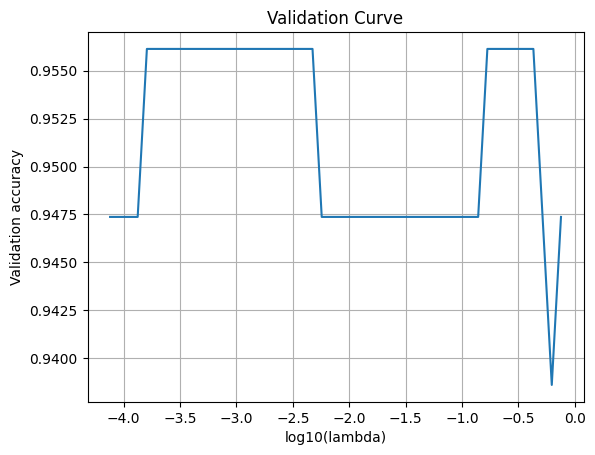

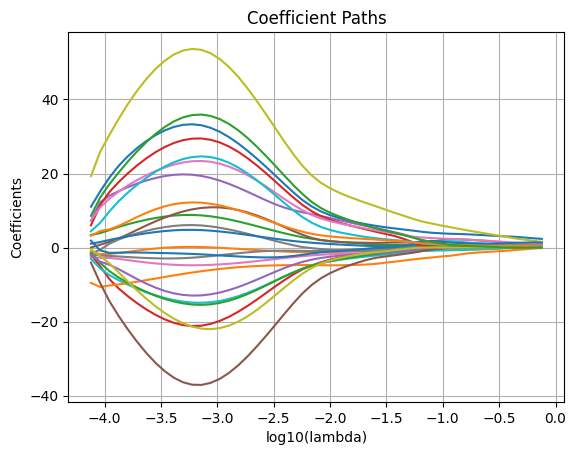

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from src.LogRegCDD import LogRegCDD


LogRegCDD_Breast_Cancer = LogRegCDD(alpha=0.5, n_lambda=50)

LogRegCDD_Breast_Cancer.fit(X_train, Y_train)

val_scores = LogRegCDD_Breast_Cancer.validate(X_test, Y_test, measure="accuracy")
print("Validation scores:", val_scores)

best_lambda = LogRegCDD_Breast_Cancer.lambdas_[val_scores.argmax()]
print("Best lambda:", best_lambda)

probs = LogRegCDD_Breast_Cancer.predict_proba(X_test)
print("Probabilities:", probs[:5])

LogRegCDD_Breast_Cancer.plot_score(measure="accuracy")
LogRegCDD_Breast_Cancer.plot_coef()

### Elastic net, alpha = 0.1

Validation scores: [0.94736842 0.94736842 0.94736842 0.94736842 0.95614035 0.95614035
 0.95614035 0.95614035 0.95614035 0.95614035 0.95614035 0.95614035
 0.94736842 0.94736842 0.94736842 0.94736842 0.94736842 0.94736842
 0.94736842 0.94736842 0.94736842 0.94736842 0.94736842 0.94736842
 0.94736842 0.94736842 0.94736842 0.94736842 0.94736842 0.95614035
 0.95614035 0.95614035 0.95614035 0.95614035 0.95614035 0.95614035
 0.95614035 0.95614035 0.96491228 0.96491228 0.96491228 0.96491228
 0.95614035 0.94736842 0.94736842 0.94736842 0.93859649 0.93859649
 0.94736842 0.94736842]
Best lambda: 0.4782862340534596
Probabilities: [0.98920662 0.95629453 0.70165935 0.94108394 0.05473092]


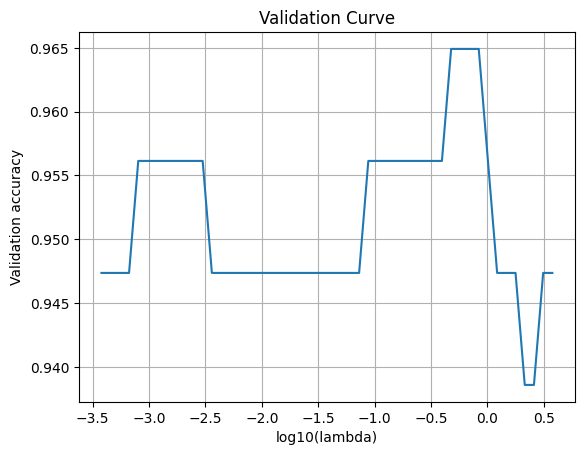

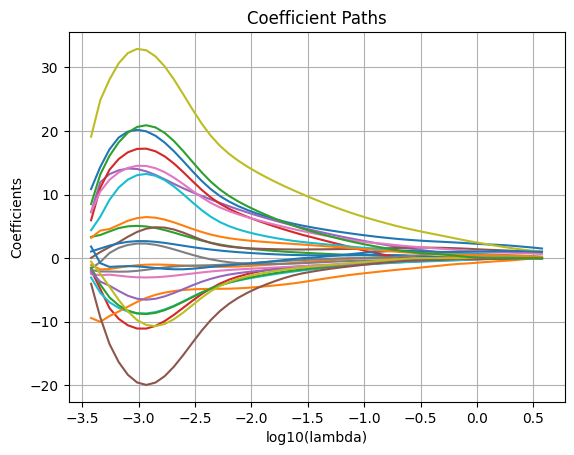

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from src.LogRegCDD import LogRegCDD


LogRegCDD_Breast_Cancer = LogRegCDD(alpha=0.1, n_lambda=50)

LogRegCDD_Breast_Cancer.fit(X_train, Y_train)

val_scores = LogRegCDD_Breast_Cancer.validate(X_test, Y_test, measure="accuracy")
print("Validation scores:", val_scores)

best_lambda = LogRegCDD_Breast_Cancer.lambdas_[val_scores.argmax()]
print("Best lambda:", best_lambda)

probs = LogRegCDD_Breast_Cancer.predict_proba(X_test)
print("Probabilities:", probs[:5])

LogRegCDD_Breast_Cancer.plot_score(measure="accuracy")
LogRegCDD_Breast_Cancer.plot_coef()

### Ionosphere

In [80]:
path = "../data/preprocessed/ionosphere.csv"

In [81]:
df = pd.read_csv(path)
df_train = df.sample(frac=0.8, random_state=42)
df_test = df.drop(df_train.index)

In [83]:
Y_train = df_train["Y"].values
Y_test = df_test["Y"].values

In [84]:
X_train = df_train.drop(columns=["Y"]).values
X_test = df_test.drop(columns=["Y"]).values

### Ridge, alpha = 1

Validation scores: [0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.81428571 0.82857143 0.82857143 0.82857143 0.82857143
 0.85714286 0.85714286]
Best lambda: 0.10665861278206712
Probabilities: [0.96184175 0.98609697 0.99605185 0.00191883 0.97991171]


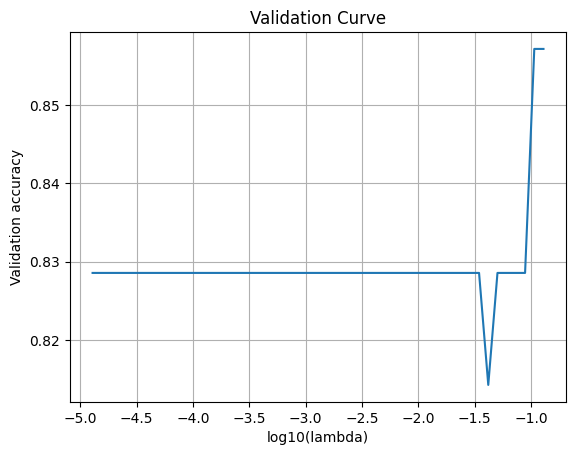

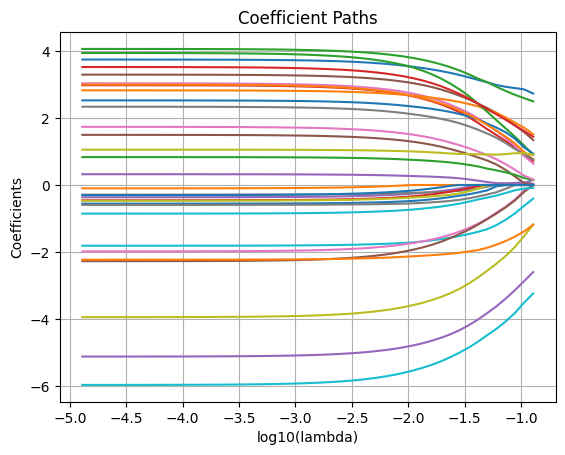

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from src.LogRegCDD import LogRegCDD 


LogRegCDD_ionosphere = LogRegCDD(alpha=1.0, n_lambda=50)

LogRegCDD_ionosphere.fit(X_train, Y_train)

val_scores = LogRegCDD_ionosphere.validate(X_test, Y_test, measure="accuracy")
print("Validation scores:", val_scores)

best_lambda = LogRegCDD_ionosphere.lambdas_[val_scores.argmax()]
print("Best lambda:", best_lambda)

probs = LogRegCDD_ionosphere.predict_proba(X_test)
print("Probabilities:", probs[:5])

LogRegCDD_ionosphere.plot_score(measure="accuracy")
LogRegCDD_ionosphere.plot_coef()

### Elastic net, alpha = 0.5

Validation scores: [0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.85714286
 0.84285714 0.84285714]
Best lambda: 0.1767637772891324
Probabilities: [0.95984021 0.98334195 0.99460854 0.00487489 0.97574009]


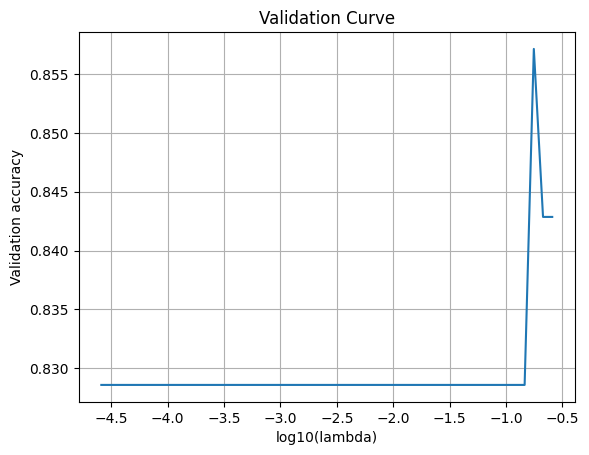

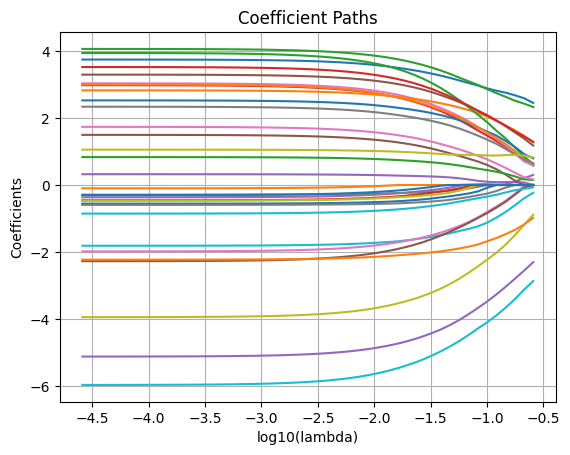

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from src.LogRegCDD import LogRegCDD


LogRegCDD_ionosphere = LogRegCDD(alpha=0.5, n_lambda=50)

LogRegCDD_ionosphere.fit(X_train, Y_train)

val_scores = LogRegCDD_ionosphere.validate(X_test, Y_test, measure="accuracy")
print("Validation scores:", val_scores)

best_lambda = LogRegCDD_ionosphere.lambdas_[val_scores.argmax()]
print("Best lambda:", best_lambda)

probs = LogRegCDD_ionosphere.predict_proba(X_test)
print("Probabilities:", probs[:5])

LogRegCDD_ionosphere.plot_score(measure="accuracy")
LogRegCDD_ionosphere.plot_coef()

### wine quality

In [88]:
path = "../data/preprocessed/wine_quality.csv"

In [89]:
df = pd.read_csv(path)
df_train = df.sample(frac=0.8, random_state=42)
df_test = df.drop(df_train.index)
Y_train = df_train["Y"].values
Y_test = df_test["Y"].values
X_train = df_train.drop(columns=["Y"]).values
X_test = df_test.drop(columns=["Y"]).values


### Ridge, alpha = 1

Validation scores: [0.96458814 0.96535797 0.96535797 0.96535797 0.96535797 0.96535797
 0.96535797 0.96535797 0.96535797 0.96458814 0.96458814 0.96458814
 0.96458814 0.96458814 0.96458814 0.96458814 0.96458814 0.96458814
 0.96458814 0.96458814 0.96458814 0.96458814 0.96458814 0.96458814
 0.96458814 0.96458814 0.96458814 0.96458814 0.96458814 0.96381832
 0.96381832 0.96458814 0.96535797 0.96612779 0.96612779 0.96612779
 0.96458814 0.96458814 0.96458814 0.96227868 0.9630485  0.96381832
 0.9630485  0.96150885 0.95765974 0.95073133 0.94149346 0.93918399
 0.93533487 0.93379523]
Best lambda: 0.015257000242899232
Probabilities: [0.01114404 0.00140602 0.00226909 0.02340096 0.05835411]


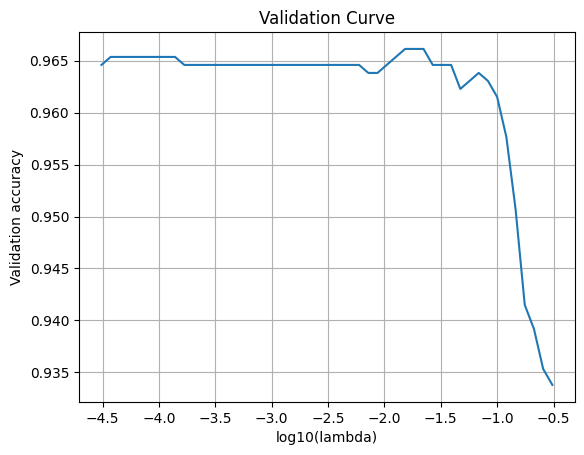

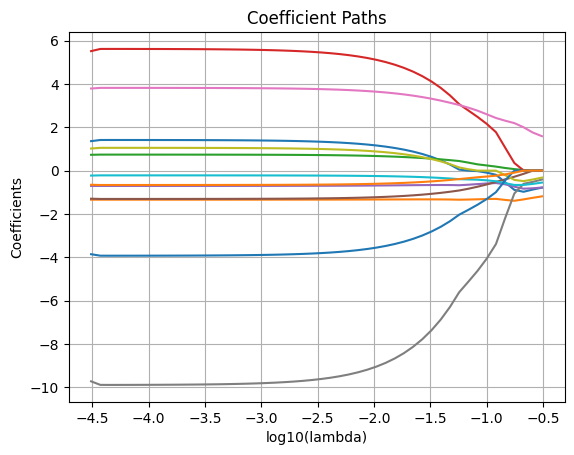

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from src.LogRegCDD import LogRegCDD 


LogRegCDD_winequality = LogRegCDD(alpha=1.0, n_lambda=50)

LogRegCDD_winequality.fit(X_train, Y_train)

val_scores = LogRegCDD_winequality.validate(X_test, Y_test, measure="accuracy")
print("Validation scores:", val_scores)

best_lambda = LogRegCDD_winequality.lambdas_[val_scores.argmax()]
print("Best lambda:", best_lambda)

probs = LogRegCDD_winequality.predict_proba(X_test)
print("Probabilities:", probs[:5])

LogRegCDD_winequality.plot_score(measure="accuracy")
LogRegCDD_winequality.plot_coef()

### Elastic net, alpha = 0.5

Validation scores: [0.96458814 0.96458814 0.96458814 0.96458814 0.96458814 0.96458814
 0.96458814 0.96458814 0.96458814 0.96458814 0.96458814 0.96458814
 0.96458814 0.96458814 0.96458814 0.96458814 0.96458814 0.96458814
 0.96458814 0.96381832 0.96381832 0.96381832 0.96458814 0.96535797
 0.96535797 0.96689761 0.96612779 0.96535797 0.96535797 0.96535797
 0.96535797 0.96458814 0.96458814 0.9630485  0.96227868 0.9630485
 0.96381832 0.96381832 0.96458814 0.9630485  0.96150885 0.95612009
 0.9530408  0.94996151 0.94611239 0.93995381 0.93918399 0.9361047
 0.93533487 0.9330254 ]
Best lambda: 0.3391625787386627
Probabilities: [0.02221615 0.00376833 0.00568781 0.03906984 0.08300923]


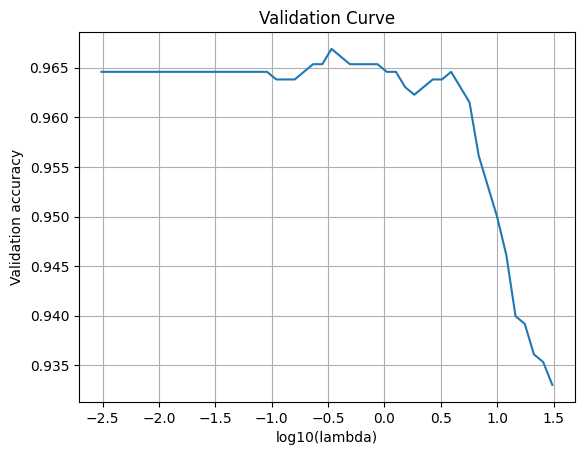

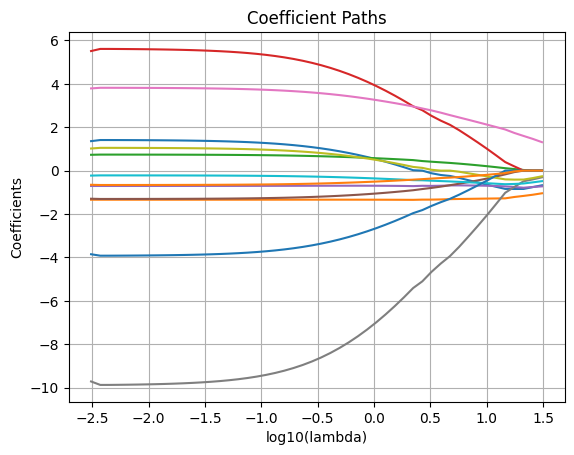

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from src.LogRegCDD import LogRegCDD


LogRegCDD_winequality = LogRegCDD(alpha=0.01, n_lambda=50)

LogRegCDD_winequality.fit(X_train, Y_train)

val_scores = LogRegCDD_winequality.validate(X_test, Y_test, measure="accuracy")
print("Validation scores:", val_scores)

best_lambda = LogRegCDD_winequality.lambdas_[val_scores.argmax()]
print("Best lambda:", best_lambda)

probs = LogRegCDD_winequality.predict_proba(X_test)
print("Probabilities:", probs[:5])

LogRegCDD_winequality.plot_score(measure="accuracy")
LogRegCDD_winequality.plot_coef()